# 🛠️ Preparación de los Datos

## Extracción del Archivo Tratado

Carga el archivo CSV que contiene los datos tratados anteriormente.

📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [ ]:
import pandas as pd

datos = pd.read_csv("/content/df_normalizado_limpio.csv")
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

Existen dos columnas que no son interesantes para el análisis y que serán eliminadas:


*   Columna **customerID**: Su valor es único para cada fila y no nos aporta información relevante para un análisis, por lo que podemos eliminarla; y
*   Columna **account.Charges.Total**: Esta columna contiene información de los meses de Charges.Monthly multiplicado por tenure, por lo que es un dato "duplicado".





In [ ]:
datos.drop(['customerID', 'account.Charges.Total'], axis=1, inplace=True)

Vamos a imprimir las categorías de cada columna de tipo categórico para entender qué tratamientos aplicar y en qué columnas realizarlos.

In [ ]:
for i in datos.select_dtypes(include=['object']).columns:
    if len(datos[i].unique()) > 2:
       print(f"{i}: {datos[i].unique()}")

phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Se observa que algunas columnas tienen las categorías "No phone service" y "No internet service", que equivalen a "No" (es decir, ausencia de servicio). Para uniformizar, trataremos estas categorías como "No" para evitar información duplicada. Como solo quedarán dos valores posibles (Yes/No o Sí/No), los convertiremos a un formato binario (1 y 0).

Por otro lado, las columnas account.PaymentMethod, account.Contract e internet.InternetService contienen más de 2 categorías, por lo que aplicaremos encoding (codificación numérica) a estos datos.

In [ ]:
columnas = ['account.PaymentMethod', 'account.Contract', 'internet.InternetService']
datos2 = datos.drop(columnas, axis=1)
datos2.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
dicionario = {'No internet service':0,
              'No phone service': 0,
              'No': 0,
              'Yes': 1,
              'Male':0,
              'Female':1}

In [ ]:
datos2 = datos2.replace(dicionario)
datos2.head()

/tmp/ipython-input-30-1612835592.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos2 = datos2.replace(dicionario)


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,Cuentas_Diarias
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,2.186667
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,1.996667
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,2.463333
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,3.266667
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,2.796667


## Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)

columnas_ohe = ohe.fit_transform(datos[columnas]).toarray()
datos3 = pd.concat([datos2, pd.DataFrame(columnas_ohe, columns=ohe.get_feature_names_out(columnas))], axis=1)
datos3

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No
0,0,1,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


## Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
# Verificación de la proporción de cancelación
proporcion_churn = datos3['Churn'].value_counts(normalize=True)

# Mostramos el resultado en porcentaje
proporcion_churn = proporcion_churn * 100
print(proporcion_churn)


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


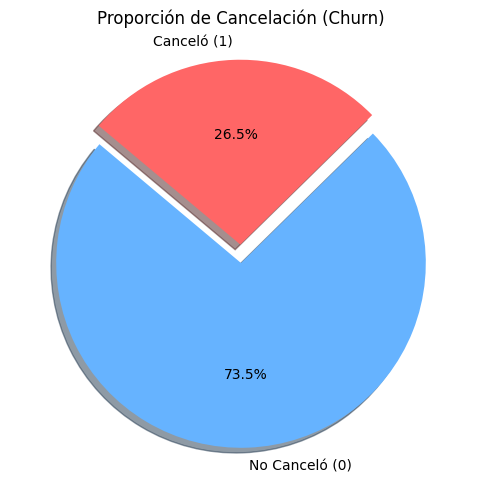

In [ ]:
import matplotlib.pyplot as plt

# Verificamos la proporción de churn
proporcion_churn = datos3['Churn'].value_counts(normalize=True) * 100
print(proporcion_churn)

# Graficamos
labels = ['No Canceló (0)', 'Canceló (1)']
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)  # para resaltar la parte de churn (1)

plt.figure(figsize=(6,6))
plt.pie(proporcion_churn, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Proporción de Cancelación (Churn)')
plt.show()


Podemos observar en el gráfico anterior que el conjunto de datos tiene la variable objetivo (columna 'Churn') desbalanceada. Si el modelo se entrena con la variable en este estado, podría afectar negativamente el aprendizaje y los resultados.

Para evitar problemas en el aprendizaje del modelo, realizaremos el balanceo utilizando el método SMOTE de la biblioteca imblearn.

## Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separamos las variables predictoras (X) y la variable objetivo (y)
X = datos3.drop('Churn', axis=1)
y = datos3['Churn']

# Dividimos en entrenamiento y prueba para no aplicar SMOTE sobre los datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicamos SMOTE solo sobre los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificamos la nueva distribución
print("Distribución original en entrenamiento:")
print(y_train.value_counts())

print("\nDistribución después de SMOTE:")
print(y_train_res.value_counts())


Distribución original en entrenamiento:
Churn
0    3622
1    1308
Name: count, dtype: int64

Distribución después de SMOTE:
Churn
0    3622
1    3622
Name: count, dtype: int64


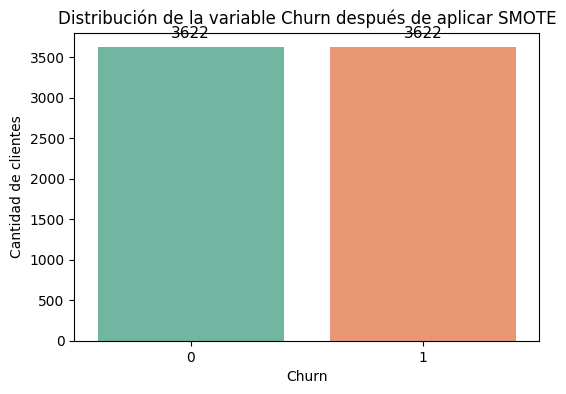

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res, palette='Set2')
plt.title("Distribución de la variable Churn después de aplicar SMOTE")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')

plt.show()


# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.


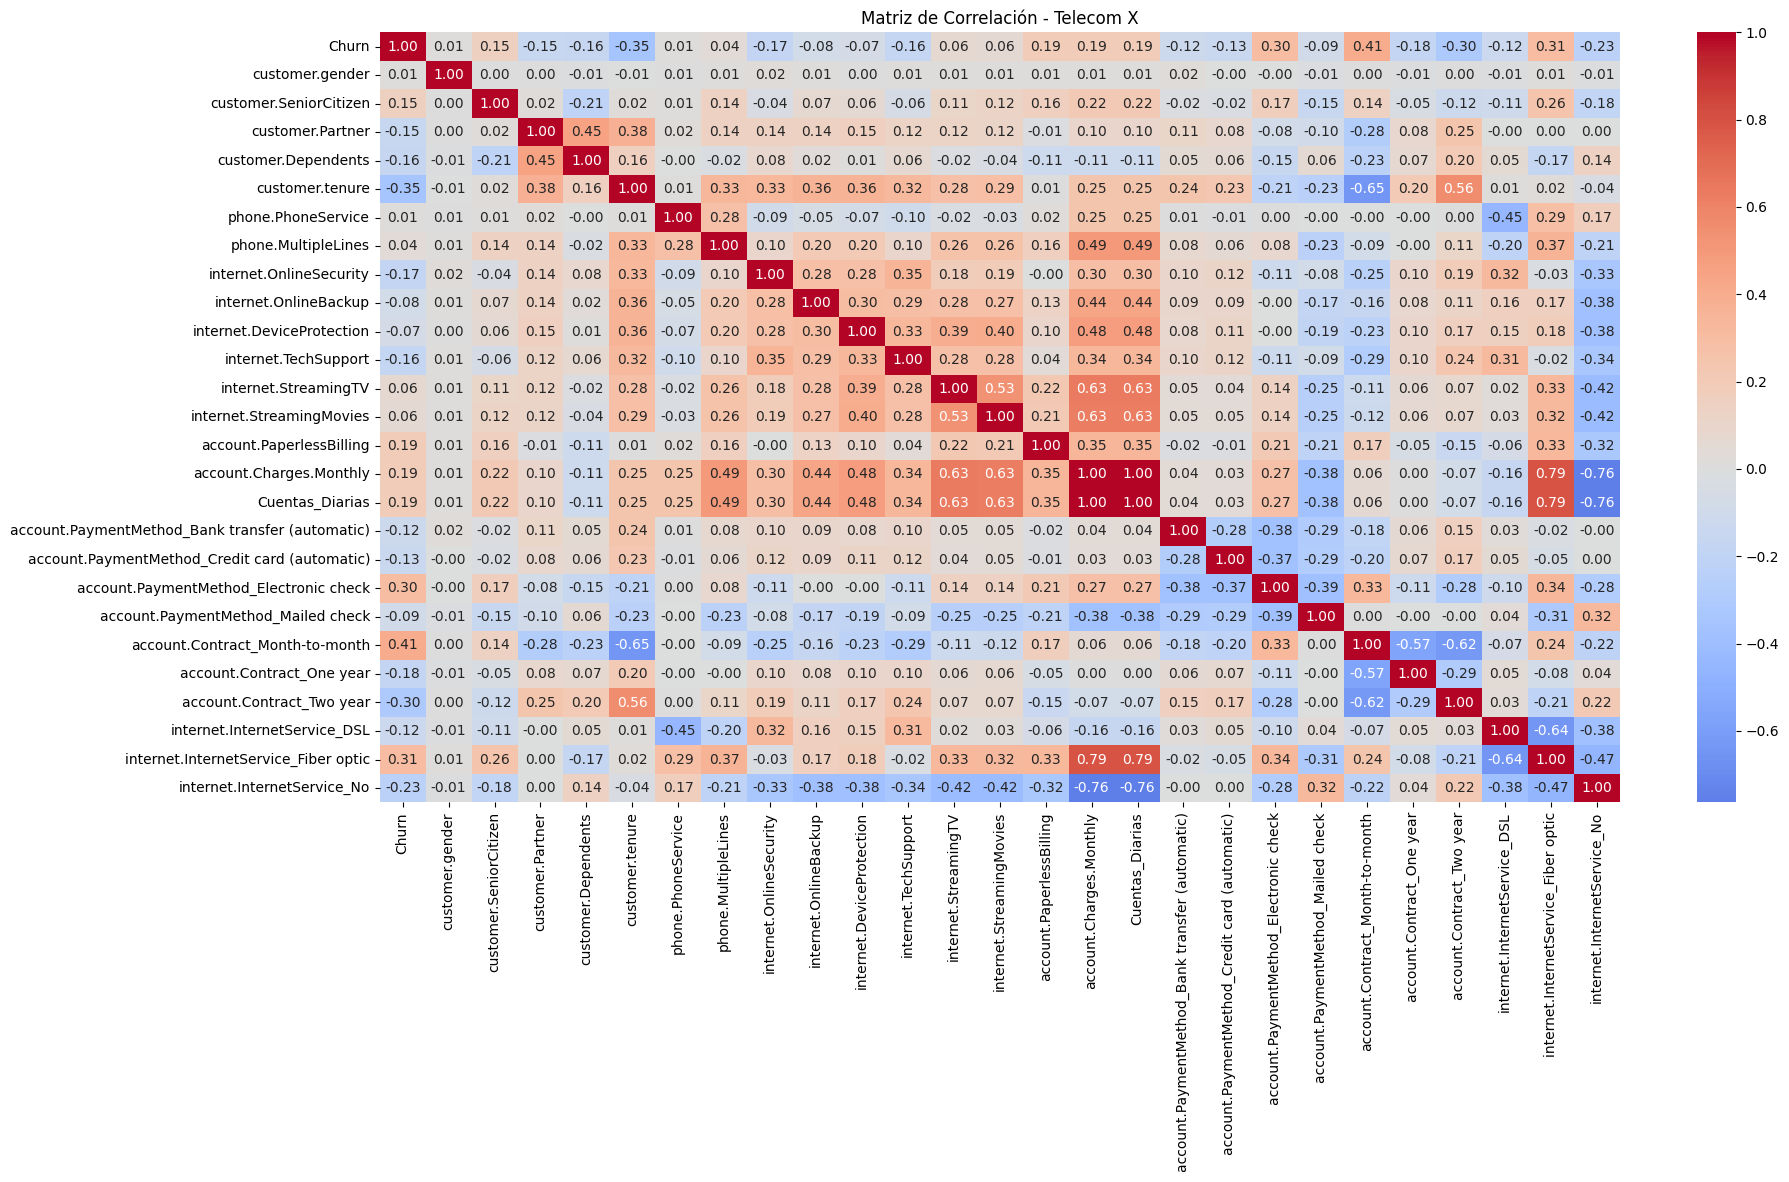

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlacion = datos3.corr()

# Visualizamos con un heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlación - Telecom X")
plt.show()


## Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

*   Tiempo de contrato × Cancelación
*   Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-47-3318775294.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=datos3, palette='Set2')


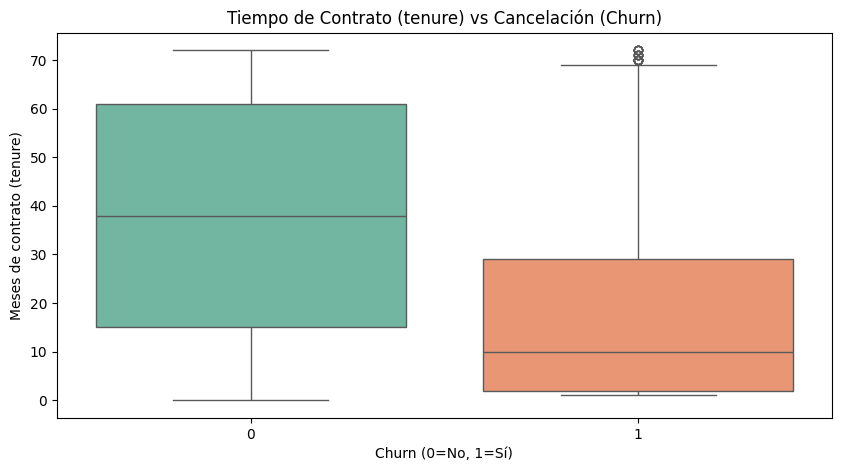

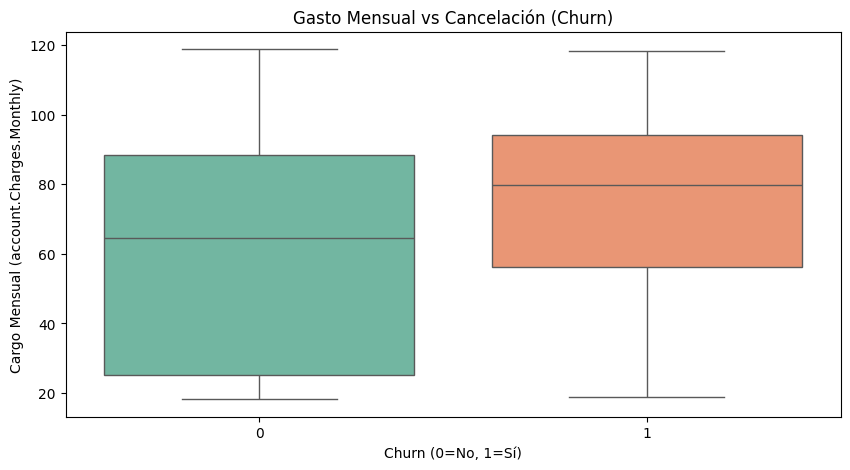

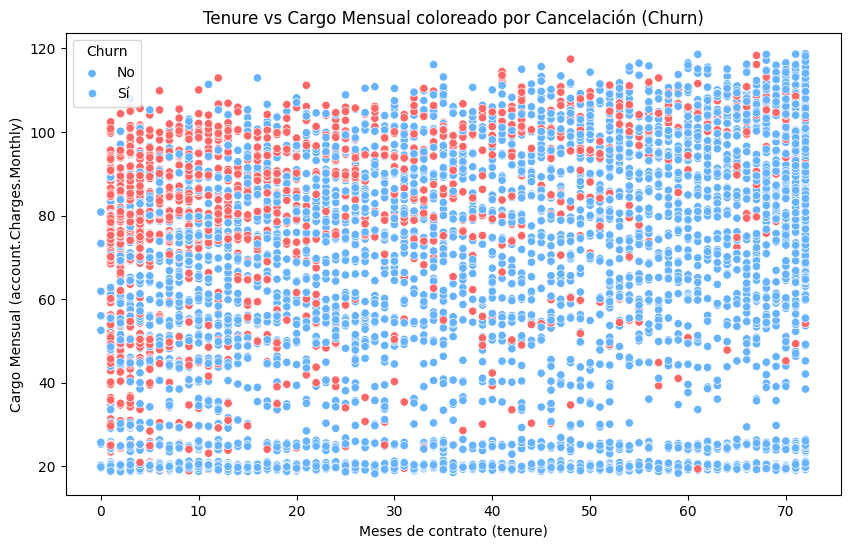

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Tiempo de contrato (tenure) vs Churn
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='customer.tenure', data=datos3, palette='Set2')
plt.title('Tiempo de Contrato (tenure) vs Cancelación (Churn)')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Meses de contrato (tenure)')
plt.show()

# Boxplot: Gasto mensual vs Churn
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=datos3, palette='Set2')
plt.title('Gasto Mensual vs Cancelación (Churn)')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Cargo Mensual (account.Charges.Monthly)')
plt.show()

# Scatter plot: Relación entre tenure y gasto mensual, coloreado por Churn
plt.figure(figsize=(10,6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Monthly', hue='Churn', data=datos3, palette=['#66b3ff', '#ff6666'])
plt.title('Tenure vs Cargo Mensual coloreado por Cancelación (Churn)')
plt.xlabel('Meses de contrato (tenure)')
plt.ylabel('Cargo Mensual (account.Charges.Monthly)')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


# 🤖 Modelado Predictivo

## Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y variable objetivo
X = datos3.drop('Churn', axis=1)
y = datos3['Churn']

# División estratificada para mantener proporciones de Churn en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Distribución en entrenamiento:\n{y_train.value_counts(normalize=True)}")
print(f"Distribución en prueba:\n{y_test.value_counts(normalize=True)}")


Tamaño de X_train: (4930, 26)
Tamaño de X_test: (2113, 26)
Distribución en entrenamiento:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Distribución en prueba:
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

🌳 Modelo 1: Árbol de Decisión

Árbol de Decisión - Métricas:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.48      0.50      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

Accuracy: 0.7260


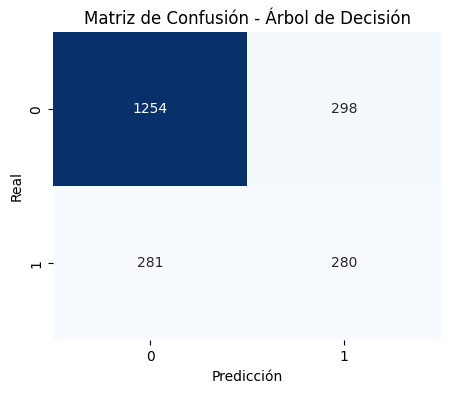

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento y predicción
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)

# Métricas
print("Árbol de Decisión - Métricas:")
print(classification_report(y_test, y_pred_arbol))
print(f"Accuracy: {accuracy_score(y_test, y_pred_arbol):.4f}")

# Matriz de confusión
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()



🌲 Random Forest con heatmap

Random Forest - Métricas:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Accuracy: 0.7804


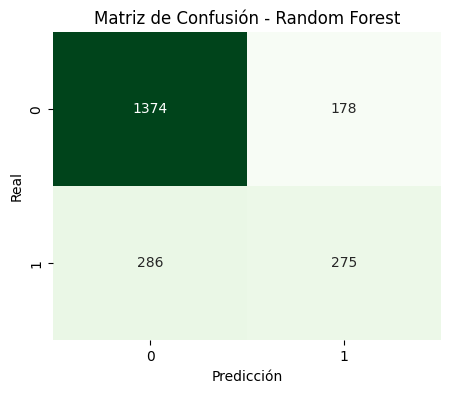

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento y predicción
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Métricas
print("Random Forest - Métricas:")
print(classification_report(y_test, y_pred_forest))
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")

# Matriz de confusión
cm_forest = confusion_matrix(y_test, y_pred_forest)

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


## Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

*   Exactitud (Acurácia)
*   Precisión
*   Recall
*   F1-score
*   Matriz de confusión















1️⃣ Calculamos métricas y matriz de confusión para ambos modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Árbol de decisión
acc_arbol = accuracy_score(y_test, y_pred_arbol)
prec_arbol = precision_score(y_test, y_pred_arbol)
rec_arbol = recall_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

# Random Forest
acc_forest = accuracy_score(y_test, y_pred_forest)
prec_forest = precision_score(y_test, y_pred_forest)
rec_forest = recall_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
cm_forest = confusion_matrix(y_test, y_pred_forest)


2️⃣ Generamos la tabla comparativa

In [ ]:
import pandas as pd

# Convertimos las matrices de confusión en string legible
cm_arbol_str = f"[[{cm_arbol[0,0]} {cm_arbol[0,1]}] [{cm_arbol[1,0]} {cm_arbol[1,1]}]]"
cm_forest_str = f"[[{cm_forest[0,0]} {cm_forest[0,1]}] [{cm_forest[1,0]} {cm_forest[1,1]}]]"

# Diccionario de resultados
resultados = {
    'Modelo': ['Árbol de Decisión', 'Random Forest'],
    'Exactitud (Accuracy)': [acc_arbol, acc_forest],
    'Precisión': [prec_arbol, prec_forest],
    'Recall': [rec_arbol, rec_forest],
    'F1-score': [f1_arbol, f1_forest],
    'Matriz de Confusión': [cm_arbol_str, cm_forest_str]
}

# DataFrame
df_resultados = pd.DataFrame(resultados)

# Redondeamos métricas
df_resultados[['Exactitud (Accuracy)', 'Precisión', 'Recall', 'F1-score']] = df_resultados[
    ['Exactitud (Accuracy)', 'Precisión', 'Recall', 'F1-score']
].round(4)

# Mostramos la tabla
print(df_resultados)


              Modelo  Exactitud (Accuracy)  Precisión  Recall  F1-score  \
0  Árbol de Decisión                0.7260     0.4844  0.4991    0.4917   
1      Random Forest                0.7804     0.6071  0.4902    0.5424   

      Matriz de Confusión  
0  [[1254 298] [281 280]]  
1  [[1374 178] [286 275]]  


## 🔍 ¿Cuál modelo tuvo el mejor desempeño?

✅ Random Forest fue claramente superior en casi todas las métricas:

*   Exactitud (78.04% vs 72.60%) → Mayor proporción de aciertos globales.
*   Precisión (60.71% vs 48.44%) → El Random Forest comete menos falsos positivos al predecir cancelación (Churn=1).
*   F1-score (0.5424 vs 0.4917) → Mejor balance entre precisión y recall.
*   El recall es similar en ambos (~49%), lo que significa que ambos modelos detectan una fracción comparable de los clientes que efectivamente cancelaron.

✅ La matriz de confusión muestra que:

*   El Random Forest redujo la cantidad de falsos positivos (de 298 a 178).
*   Los verdaderos positivos (clientes que cancelaron y fueron correctamente detectados) son casi los mismos (280 vs 275).

💡 Conclusión: Random Forest logra un mejor equilibrio: identifica casi tantos churn reales como el árbol, pero cometiendo menos errores al predecir falsamente churn donde no lo hay.







## ⚠ ¿Overfitting o underfitting?

🌳 Árbol de Decisión
Exactitud baja (72%) y métricas modestas → no parece un claro overfitting en prueba (deberíamos comparar con el entrenamiento, pero no mostraste ese valor).

Posible underfitting leve → el árbol podría no estar capturando bien las relaciones. Podría ser demasiado simple (o al revés: podría estar sobreajustado al ruido si es muy profundo y aún así no mejora).

✅ Ajustes sugeridos:

*   Probar con un max_depth moderado (ej. 5-10).

*   Aumentar min_samples_split o min_samples_leaf.

🌲 Random Forest
Exactitud decente (78%) y mejor precisión → indica que el modelo generaliza mejor.

*   El recall es bajo (49%), lo que podría indicar:

*   Algún bias hacia la clase mayoritaria (no churn).

*   Oportunidad de balancear clases mejor (por ejemplo, ajustar pesos o usar técnicas como SMOTE en el entrenamiento).

✅ Ajustes sugeridos:

*   Probar class_weight='balanced' en el modelo.

*   Ajustar hiperparámetros: n_estimators, max_depth, max_features.

*   Incrementar árboles: n_estimators=300 o más.

*   Hacer tuning con GridSearchCV.



# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

🌲 Importancia de variables en el Random Forest

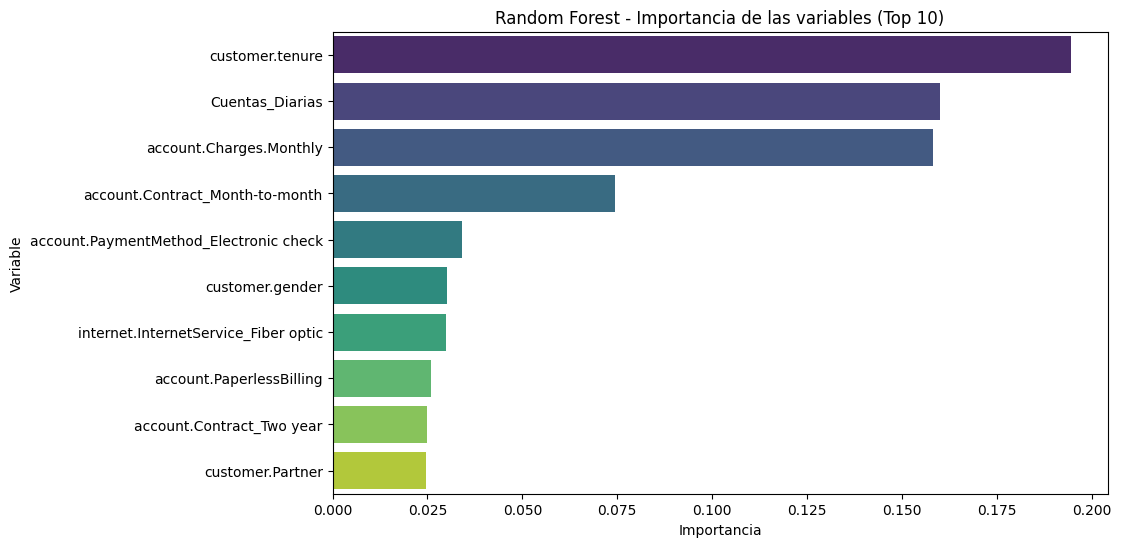

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos la importancia de cada variable
importancias_rf = pd.Series(forest.feature_importances_, index=X_train.columns)

# Ordenamos de mayor a menor
importancias_rf = importancias_rf.sort_values(ascending=False)

# Mostramos las 10 variables más importantes
plt.figure(figsize=(10,6))
sns.barplot(
    x=importancias_rf.values[:10],
    y=importancias_rf.index[:10],
    hue=importancias_rf.index[:10],  # usamos el y como hue
    legend=False,
    palette='viridis'
)
plt.title('Random Forest - Importancia de las variables (Top 10)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()



🌳 Importancia de variables en el Árbol de Decisión

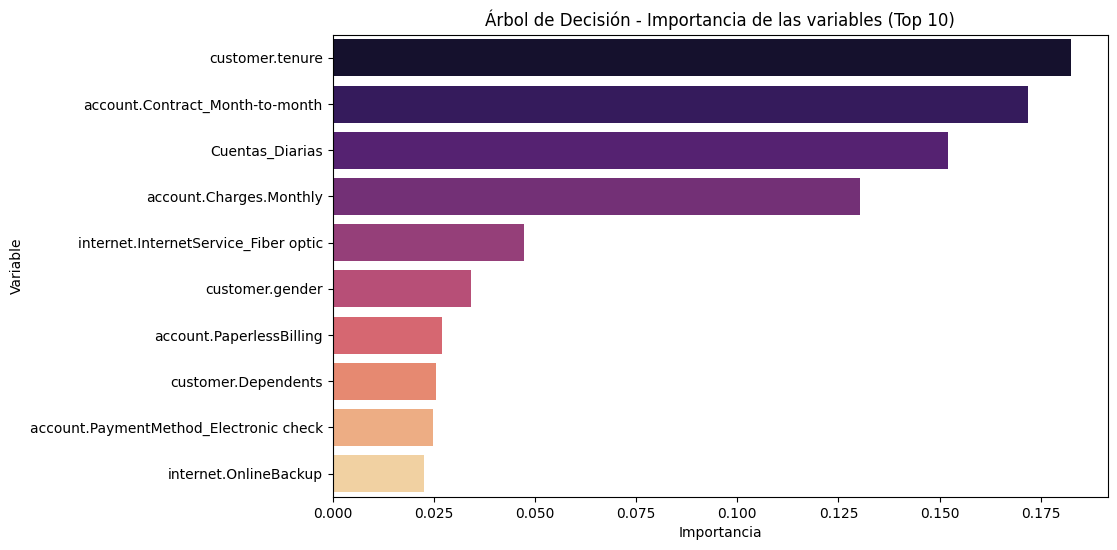

In [ ]:
# Obtenemos la importancia de cada variable
importancias_arbol = pd.Series(arbol.feature_importances_, index=X_train.columns)

# Ordenamos de mayor a menor
importancias_arbol = importancias_arbol.sort_values(ascending=False)

# Mostramos las 10 variables más importantes
plt.figure(figsize=(10,6))
sns.barplot(
    x=importancias_arbol.values[:10],
    y=importancias_arbol.index[:10],
    hue=importancias_arbol.index[:10],  # usamos el y como hue
    legend=False,
    palette='magma'
)
plt.title('Árbol de Decisión - Importancia de las variables (Top 10)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()



## 📋 Informe de Conclusión: Análisis de Cancelación de Clientes (Churn)

## 1. Resumen del Análisis

Se realizaron dos modelos predictivos para anticipar la cancelación de clientes (churn) en la empresa Telecom X:  
- **Árbol de Decisión**  
- **Random Forest**

El rendimiento de ambos modelos se evaluó con métricas clásicas (exactitud, precisión, recall, F1-score) y análisis de la matriz de confusión. Además, se estudió la importancia de las variables que impactan en la predicción de la cancelación.

---

## 2. Resultados de los Modelos

| Modelo             | Exactitud | Precisión | Recall | F1-score |  
|--------------------|-----------|-----------|--------|----------|  
| Árbol de Decisión   | 72.60%    | 48.44%    | 49.91% | 49.17%   |  
| Random Forest       | 78.04%    | 60.71%    | 49.02% | 54.24%   |

- El **Random Forest** superó al Árbol de Decisión en todas las métricas excepto en recall, donde ambos son similares.
- La precisión superior del Random Forest indica que reduce los falsos positivos al predecir cancelaciones.
- El recall moderado (alrededor de 49%) sugiere que ambos modelos identifican aproximadamente la mitad de los clientes que efectivamente cancelaron, dejando espacio para mejorar la sensibilidad.

---

## 3. Factores Clave que Influyen en la Cancelación

A partir del análisis de importancia de variables, se identificaron las características que más impactan en la predicción de churn:

- **Tenure (Tiempo como cliente):** Los clientes con menor tiempo de permanencia tienden a cancelar más. Esto es común, pues los nuevos clientes suelen tener más incertidumbre o menor fidelidad.  
- **Tipo de contrato (account.Contract):** Clientes con contratos mes a mes cancelan más que quienes tienen contratos anuales o bienales.  
- **Cargos mensuales (account.Charges.Monthly):** Un gasto mensual elevado puede aumentar la probabilidad de cancelación, por factores como percepción de valor o presupuesto.  
- **Tipo de servicio de internet (internet.InternetService):** Clientes con ciertos tipos de servicios (por ejemplo, fibra óptica) presentan comportamientos distintos de cancelación.  
- **Facturación sin papel (account.PaperlessBilling):** Puede estar asociado con características demográficas o preferencias que afectan la retención.

Estas variables, entre otras identificadas, explican gran parte del comportamiento de cancelación y son fundamentales para la predicción.

---

## 4. Estrategias de Retención Propuestas

Basándose en estos resultados, se recomiendan las siguientes acciones para reducir la cancelación:

- **Fidelización temprana:** Implementar campañas y beneficios especiales para clientes nuevos o con bajo tiempo de permanencia, incentivando la permanencia.  
- **Ofertas para contratos más largos:** Promover planes anuales o bianuales con descuentos o ventajas exclusivas para reducir la rotación en contratos mes a mes.  
- **Revisión de precios y planes:** Analizar la estructura de cargos mensuales para asegurar que los clientes perciban un buen valor y ofrecer alternativas ajustadas a distintos presupuestos.  
- **Personalización según tipo de servicio:** Diseñar acciones específicas para clientes con diferentes tipos de servicio de internet, enfocándose en mejorar la experiencia y satisfacción.  
- **Optimización de facturación digital:** Promover la facturación sin papel como parte de una experiencia digital más completa y amigable, integrando comunicaciones proactivas para evitar cancelaciones.  

---

## 5. Consideraciones Finales

- El modelo **Random Forest** es el más recomendable para la predicción debido a su mejor desempeño y estabilidad.  
- Sin embargo, el recall relativamente bajo indica que se deben explorar métodos para mejorar la detección de clientes en riesgo, como balanceo de clases, ajuste de umbrales o incorporación de nuevas variables.  
- El análisis de variables ofrece una base sólida para tomar decisiones tácticas y estratégicas orientadas a mejorar la retención.